# Simulating Montbrio Model

In [155]:
import os
import sys
import time

import numpy as np
import scipy as sci
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [156]:
from scipy.optimize import fsolve
from scipy.optimize import root

In [157]:
import timeit
import numba
from numba import jit, njit

In [158]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from IPython.display import HTML

In [159]:
%pylab inline

plt.style.use('seaborn-talk')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['r_', 'sci', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [160]:
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [161]:
pwd

'/Users/Meysam/AnimatingMPR'

In [162]:
cwd = os.getcwd()
cwd

'/Users/Meysam/AnimatingMPR'

# Simulation of Montbrio model


$\dfrac{dr}{dt} = 2rv +\Delta/\pi$

$ \dfrac{dv}{dt} = v^2  -\pi^2 r^2 + Jr+ \eta +I(t) $



In [307]:
def Montbrio_model(v0, r0, delta, eta, J, I_input, dt, sigma):
    nsteps=len(I_input)
    r, v= np.zeros(nsteps), np.zeros(nsteps)
    
    v_init, r_init=v0, r0
    v[0],r[0]=v_init, r_init
    
    for i in range(1, nsteps):
        dr =(delta/np.pi) +2*r[i-1]*v[i-1]
        dv = v[i-1]**2  -(np.pi*r[i-1])**2 + J*r[i-1]+ eta +I_input[i-1]
        r[i]=(r[i-1] + dt * dr +np.sqrt(dt) *sigma * np.random.randn())
        v[i]=(v[i-1] + dt * dv +np.sqrt(dt) *sigma * np.random.randn())    
    
    return v,r

In [308]:
Montbrio_model_numba = numba.jit(Montbrio_model)

In [309]:
delta=0.7
eta=-4.6
J=14.5

In [310]:
eta/delta, J/np.sqrt(delta)

(-6.571428571428571, 17.330814835348708)

In [311]:
t_init = 0.0
t_final = 100.0

In [312]:
dt = 0.001
nsteps = int((t_final - t_init)/dt)
nsteps

100000

In [313]:
ts = np.arange(t_init,t_final,dt)
ts.shape

(100000,)

In [314]:
I0=3.
t0In=30
tn_In=60

In [315]:
I_input=[]
I_input = [0 for i in range(int((t0In - t_init)/dt))]+ [I0 for i in range(int((tn_In - t0In)/dt))]+ [0 for i in range(int((t_final - tn_In)/dt))]

In [316]:
I_input =np.asarray(I_input)

In [317]:
sigma=0.1

In [318]:
v0 = -0
r0 = +.5

v0 = -3.
r0 = +.5

In [332]:
start_time = time.time()

v,r = Montbrio_model_numba(v0, r0, delta, eta, J, I_input, dt, sigma)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.006323337554931641 seconds ---


In [333]:
start_time = time.time()

v,r = Montbrio_model_numba(v0, r0, delta, eta, J, I_input, dt, sigma)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0063250064849853516 seconds ---


<IPython.core.display.Javascript object>


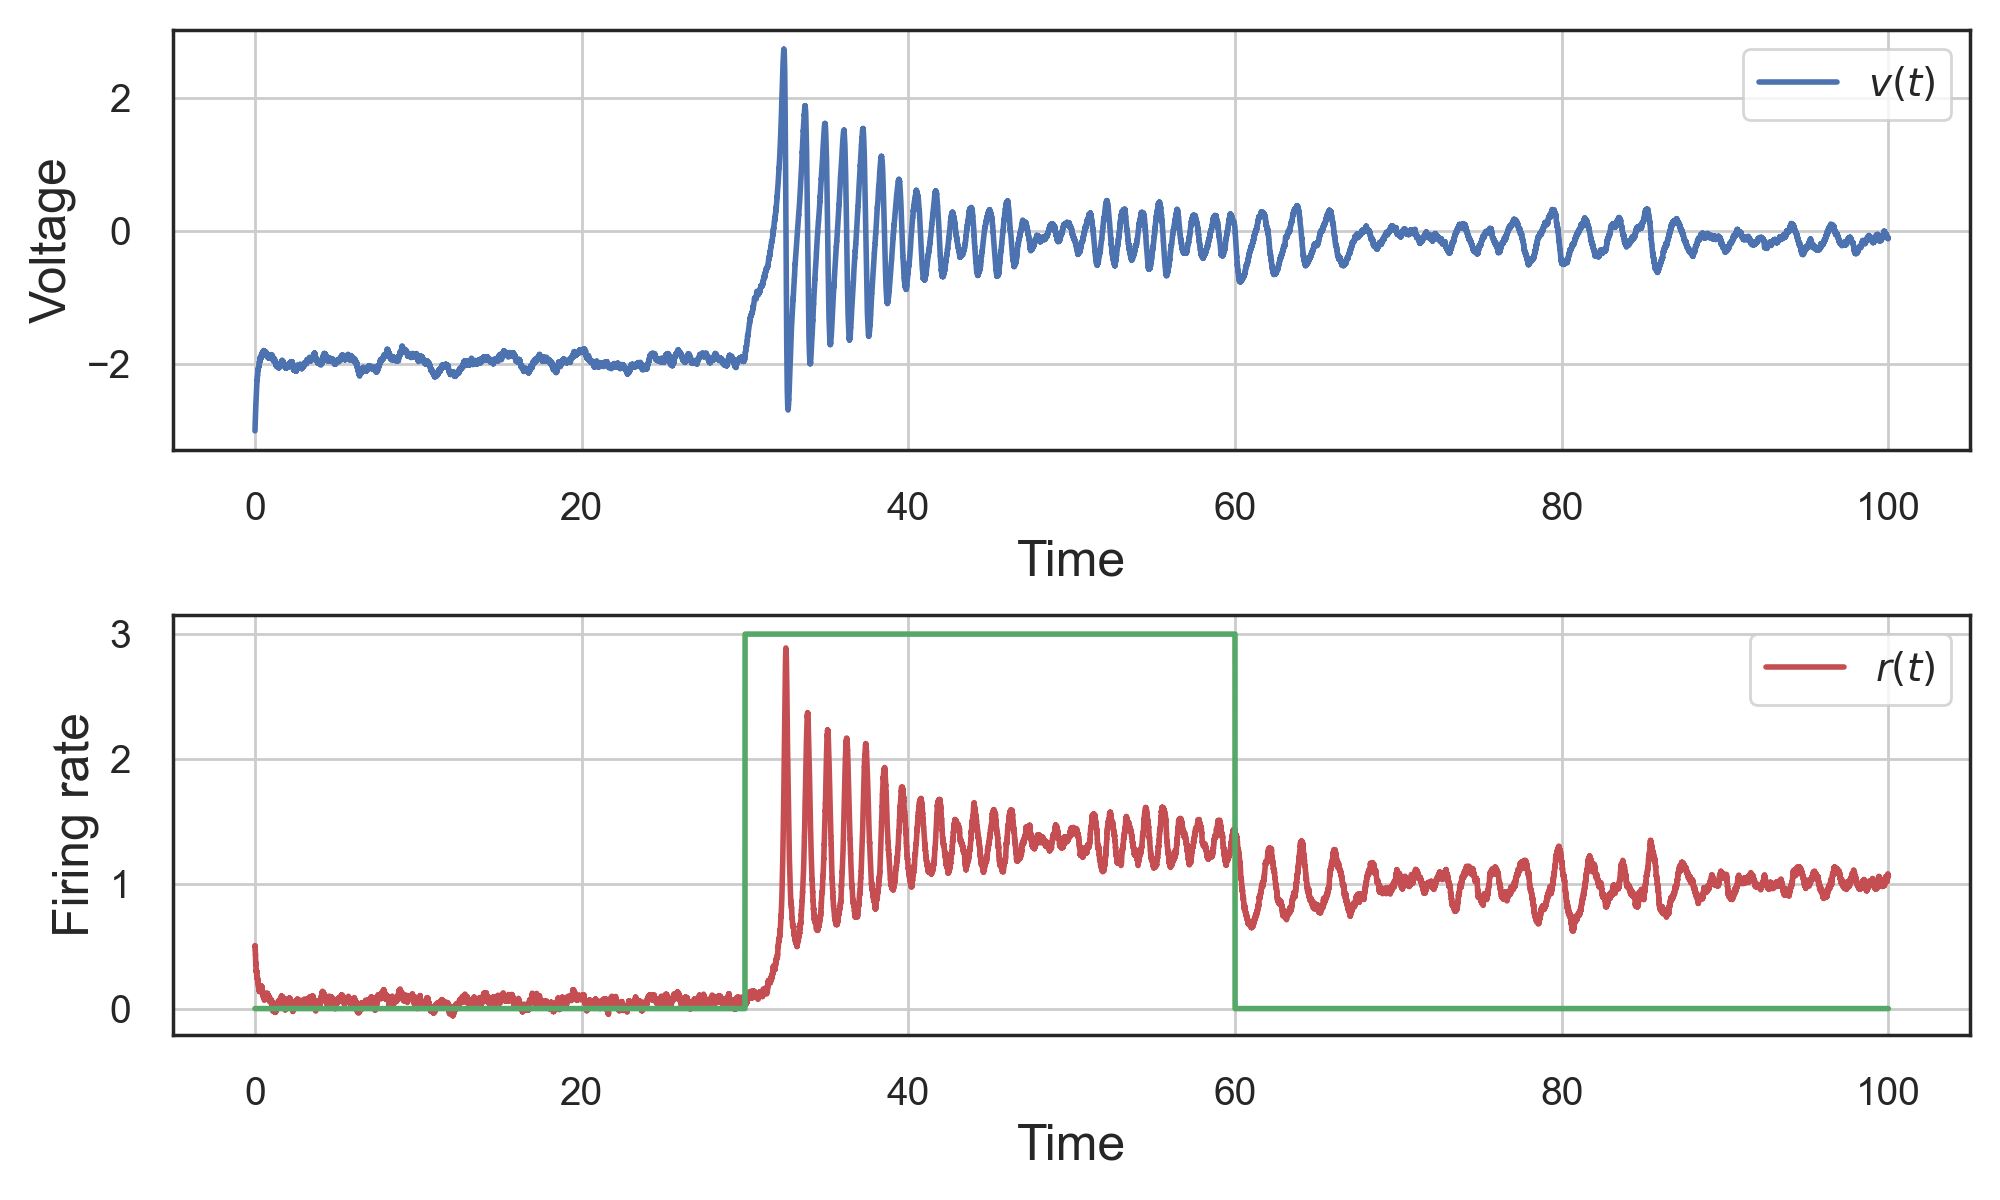

In [334]:
plt.figure(figsize=(10, 6))

plt.subplot(211)
plt.plot(ts, v, 'b', linewidth=2, label='$v(t)$')
plt.xlabel('Time', fontsize=18); plt.ylabel('Voltage', fontsize=18); 
plt.legend(loc='upper right', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.grid()

plt.subplot(212)
plt.plot(ts, r, 'r', linewidth=2, label='$r(t)$')
plt.plot(ts, I_input, 'g', linewidth=2)

plt.xlabel('Time', fontsize=18); plt.ylabel('Firing rate', fontsize=18); 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.grid()

plt.show()

In [376]:
vr_obs=np.load('Data_output/ODE_obs.npy')
#vr_obs=np.load('Data_output/SDE_obs.npy')

vr_obs.shape

(2, 100000)

In [377]:
nt=int(vr_obs.shape[1])
nt

100000

In [378]:
v_obs=vr_obs[0, 0:nt]
r_obs=vr_obs[1, 0:nt]

In [379]:
v_obs.shape, r_obs.shape

((100000,), (100000,))

In [380]:
# vr_fit=np.load('Data_output/ODE_fit_HMC_RV.npy')

# v_fit=vr_fit[0, 0:nt]
# r_fit=vr_fit[1, 0:nt]

In [381]:
vr_fit=np.load('Data_output/ODE_fit_SBI_V.npy')

v_fit=vr_fit[0:nt]
r_fit=vr_fit[nt:2*nt]

In [382]:
# vr_fit=np.load('Data_output/SDE_fit_HMC_RV.npy')

# v_fit=vr_fit[0, 0:nt]
# r_fit=vr_fit[1, 0:nt]

In [383]:
#vr_fit=np.load('Data_output/SDE_fit_SBI_RV.npy')

#v_fit=vr_fit[0, 0:nt]
#r_fit=vr_fit[1, 0:nt]

In [384]:
# vr_obs=np.load('Data_output/x_obs_sde_Multirounds_Vfeatures100k_obsI.npy')

# vr_fit=np.load('Data_output/x_fit_sde_Multirounds_Vfeatures100k_obsI.npy')


# v_obs=vr_obs[0:nt]
# r_obs=vr_obs[nt:2*nt]

# v_fit=vr_fit[0:nt]
# r_fit=vr_fit[nt:2*nt]

In [385]:
# vr_fit=np.load('Data_output/SDE_fit_HMC_V.npy')

# v_fit=vr_fit[0, 0:nt]
# r_fit=vr_fit[1, 0:nt]

In [386]:
# vr_fit=np.load('Data_output/SDE_fit_SBI_V.npy')

# v_fit=vr_fit[0, 0:nt]
# r_fit=vr_fit[1, 0:nt]

In [387]:
v_fit.shape, r_fit.shape

((100000,), (100000,))

<IPython.core.display.Javascript object>


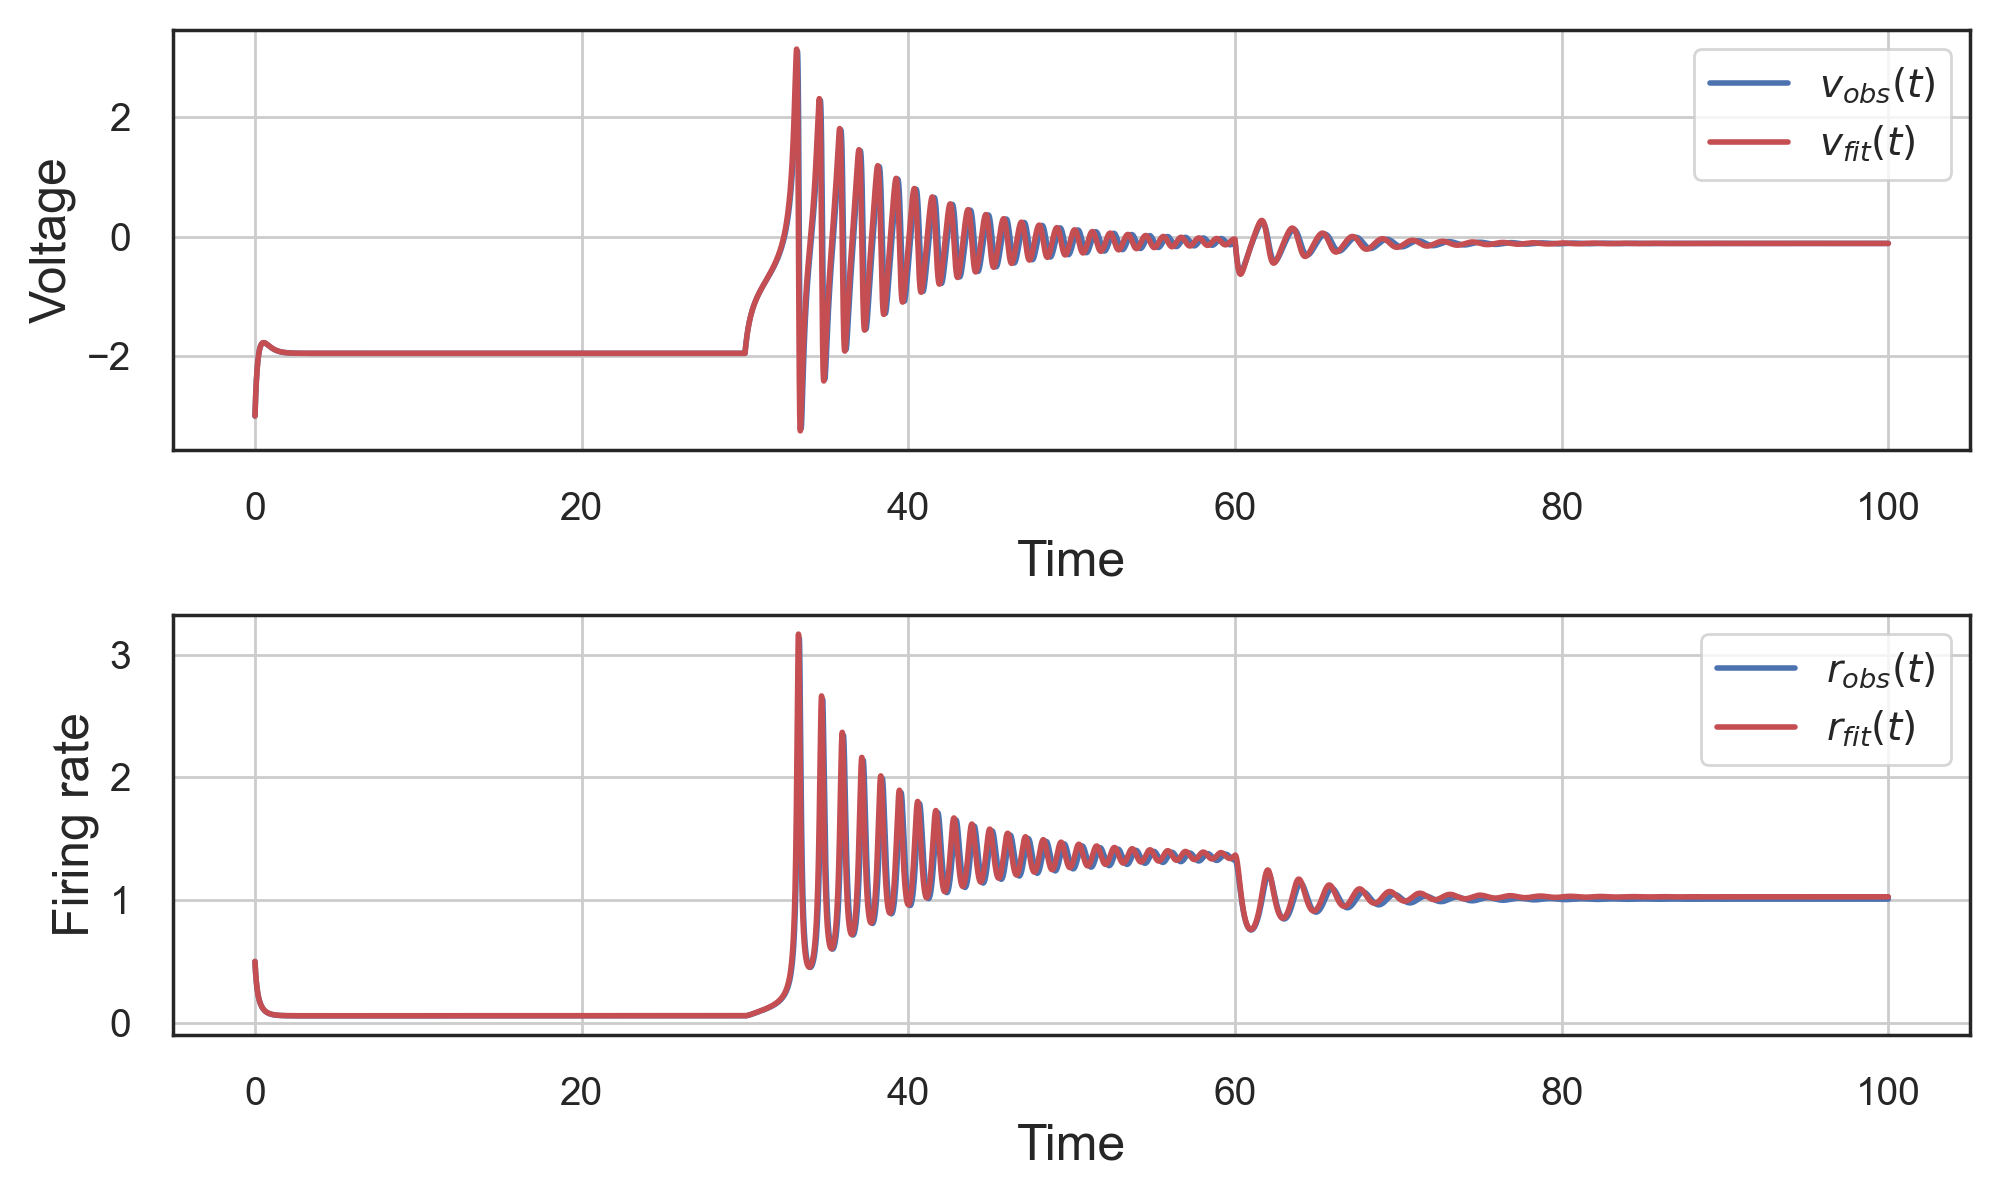

In [388]:
plt.figure(figsize=(10, 6))

plt.subplot(211)
plt.plot(ts, v_obs, 'b', linewidth=2, label='$v_{obs}(t)$')
plt.plot(ts, v_fit, 'r', linewidth=2, label='$v_{fit}(t)$')

plt.xlabel('Time', fontsize=18); plt.ylabel('Voltage', fontsize=18); 
plt.legend(loc='upper right', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.grid()

plt.subplot(212)
plt.plot(ts, r_obs, 'b', linewidth=2, label='$r_{obs}(t)$')
plt.plot(ts, r_fit, 'r', linewidth=2, label='$r_{fit}(t)$')
plt.xlabel('Time', fontsize=18); plt.ylabel('Firing rate', fontsize=18); 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.grid()

plt.show()

In [389]:
true_params=np.load('Data_output/True_params.npy')
true_params

array([ 0.7, -4.6, 14.5])

In [390]:
# posterior_samples=np.load('Data_output/ODE_posterior_HMC_RV.npy')
# posterior_samples.shape

In [391]:
posterior_samples=np.load('Data_output/ODE_posterior_SBI_V.npy')
posterior_samples.shape

(10000, 3)

In [392]:
# posterior_samples=np.load('Data_output/SDE_posterior_HMC_RV.npy')
# posterior_samples.shape

In [393]:
# posterior_samples=np.load('Data_output/SDE_posterior_SBI_RV.npy')
# posterior_samples.shape

In [394]:
# posterior_samples=np.load('Data_output/SDE_posterior_HMC_V.npy')
# posterior_samples.shape

In [395]:
# posterior_samples=np.load('Data_output/SDE_posterior_SBI_V.npy')
# posterior_samples.shape

In [396]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
import matplotlib.gridspec as gridspec
%matplotlib notebook

In [397]:
%matplotlib notebook

<IPython.core.display.Javascript object>


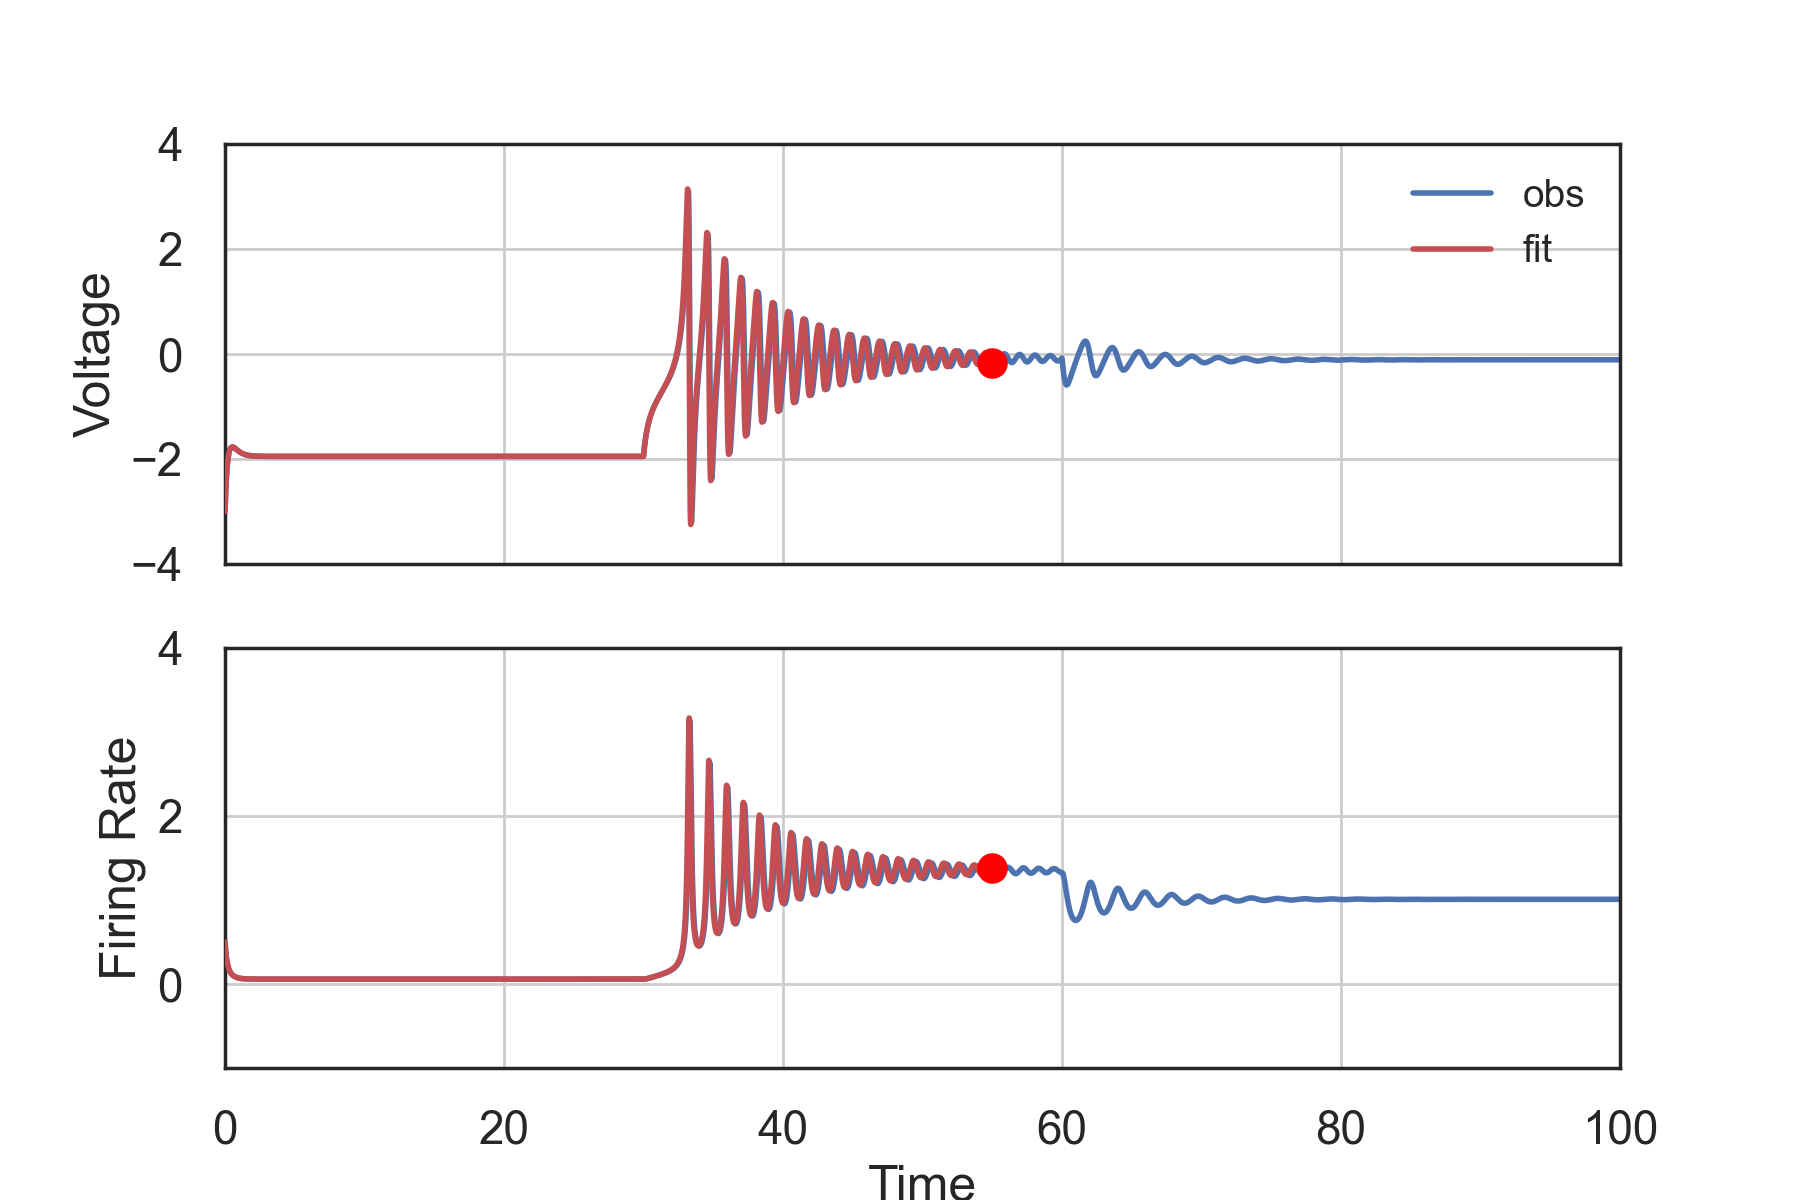

In [398]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(9, 6))

#ax1.plot(ts, v, '--', color='b', label='v')
#ax2.plot(ts, r, '--', color='r', label='r')

fs=100*10

def animate_v_r(i):
    ax1.cla() # clear the previous image
    ax1.plot(ts, v_obs,  marker="o", markersize=0, lw=2, color='b', zorder=2, label='obs') # plot the line
    ax1.plot(ts[:i*fs], v_fit[:i*fs],  marker="o", markersize=0, lw=2, color='r', zorder=4, label='fit') # plot the line
    ax1.scatter(ts[i*fs], v_fit[i*fs], s=100, color='red', zorder=4) 
    ax1.set_xlim([0, 100]) 
    ax1.set_ylim([-4, 4]) 
    ax1.set_ylabel('Voltage')
    ax1.grid(True)
    ax1.set_xticklabels([])
    #ax1.set_xticks([])
    ax1.legend(loc='upper right', frameon=False, fontsize=14)


    ax2.cla() 
    ax2.plot(ts, r_obs,  marker="o", markersize=0, lw=2, color='b', zorder=2) # plot the line
    ax2.plot(ts[:i*fs], r_fit[:i*fs],  marker="o", markersize=0, lw=2, color='r', zorder=4) # plot the line
    ax2.scatter(ts[i*fs], r_fit[i*fs], s=100, color='red', zorder=4) 
    ax2.set_xlim([0, 100]) 
    ax2.set_ylim([-1, 4]) 
    ax2.set_ylabel('Firing Rate')
    ax2.set_xlabel('Time'); 
    #ax2.legend(loc='upper right')
    ax2.grid()
   

anim_v_r = animation.FuncAnimation(fig, animate_v_r, frames = len(ts) + 1, interval = 1, blit = False)


plt.show()

In [399]:
from MPR_NMM_LSA import *

In [400]:
params_label=np.array(['$\Delta$', '$\eta$', '$J$'])

In [401]:
true_params

array([ 0.7, -4.6, 14.5])

In [402]:
delta_est=posterior_samples[:,0]
eta_est=posterior_samples[:,1]
J_est=posterior_samples[:,2]

In [403]:
delta_est_mean=delta_est.mean()
eta_est_mean=eta_est.mean()
J_est_mean=J_est.mean()

In [404]:
print("delta_est=", delta_est_mean)
print("eta_est=", eta_est_mean)
print("J_est=", J_est_mean)

delta_est= 0.7098744
eta_est= -4.61702
J_est= 14.614747


<IPython.core.display.Javascript object>


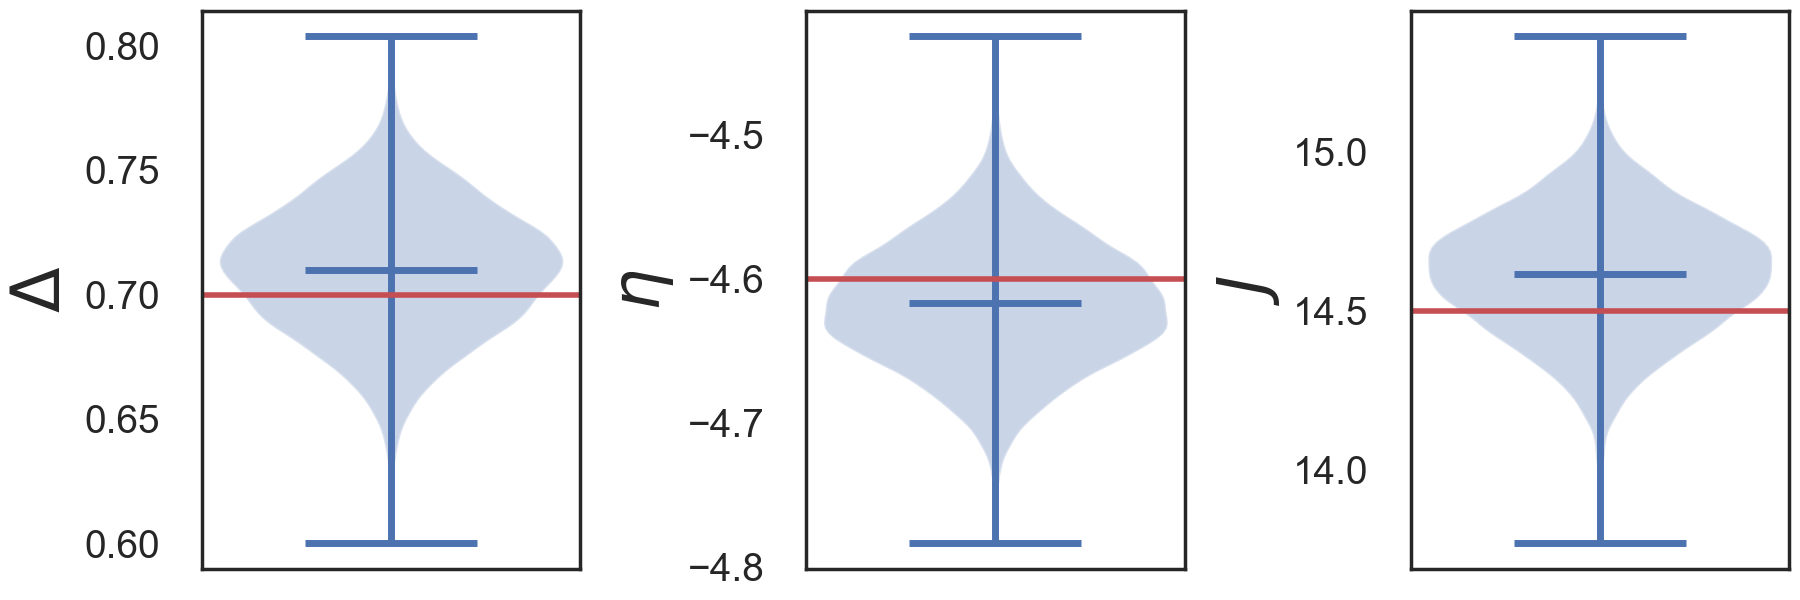

In [405]:
plt.figure(figsize=(9, 3))
for i, variables in enumerate([delta_est, eta_est, J_est]):
    plt.subplot(1,params_label.shape[0],i+1)
    plt.violinplot(variables, widths=0.7, showmeans=True, showextrema=True);
    plt.axhline(y=true_params[i], linewidth=2, color='r')
    plt.ylabel(str(params_label[i]), fontsize=24)   
    plt.xticks([])
    plt.yticks(fontsize=14)
plt.tight_layout(pad=0.4, w_pad=0.9, h_pad=1.0)
plt.show()

In [406]:
true_params

array([ 0.7, -4.6, 14.5])

In [407]:
delta_est.mean(), eta_est.mean(), J_est.mean()

(0.7098744, -4.61702, 14.614747)

In [408]:
scenarios = [
     {"delta":true_params[0], "eta":true_params[1], "J":true_params[2], "I0":0.},
     {"delta":posterior_samples[:,0].mean(), "eta":posterior_samples[:,1].mean(), "J":posterior_samples[:,2].mean(), "I0":0.}
]

In [409]:
param=scenarios[0]
param

{'delta': 0.7, 'eta': -4.6, 'J': 14.5, 'I0': 0.0}

In [410]:
eqnproot = {}
for i, param in enumerate(scenarios):
    eqnproot[i] = find_roots(**param)

In [411]:
eqnproot

{0: [[-0.0482872726554712, 2.307201339765533],
  [0.05712174222543427, -1.9503687356846853],
  [0.45231054025199185, -0.24630967056893854],
  [1.0080121529919428, -0.11052293351191098]],
 1: [[-0.04882663940083897, 2.313901177243701],
  [0.05793087454119592, -1.950255701907493],
  [0.44561910370526603, -0.2535349527231677],
  [1.0260601412954657, -0.11011052261304154]]}

<IPython.core.display.Javascript object>


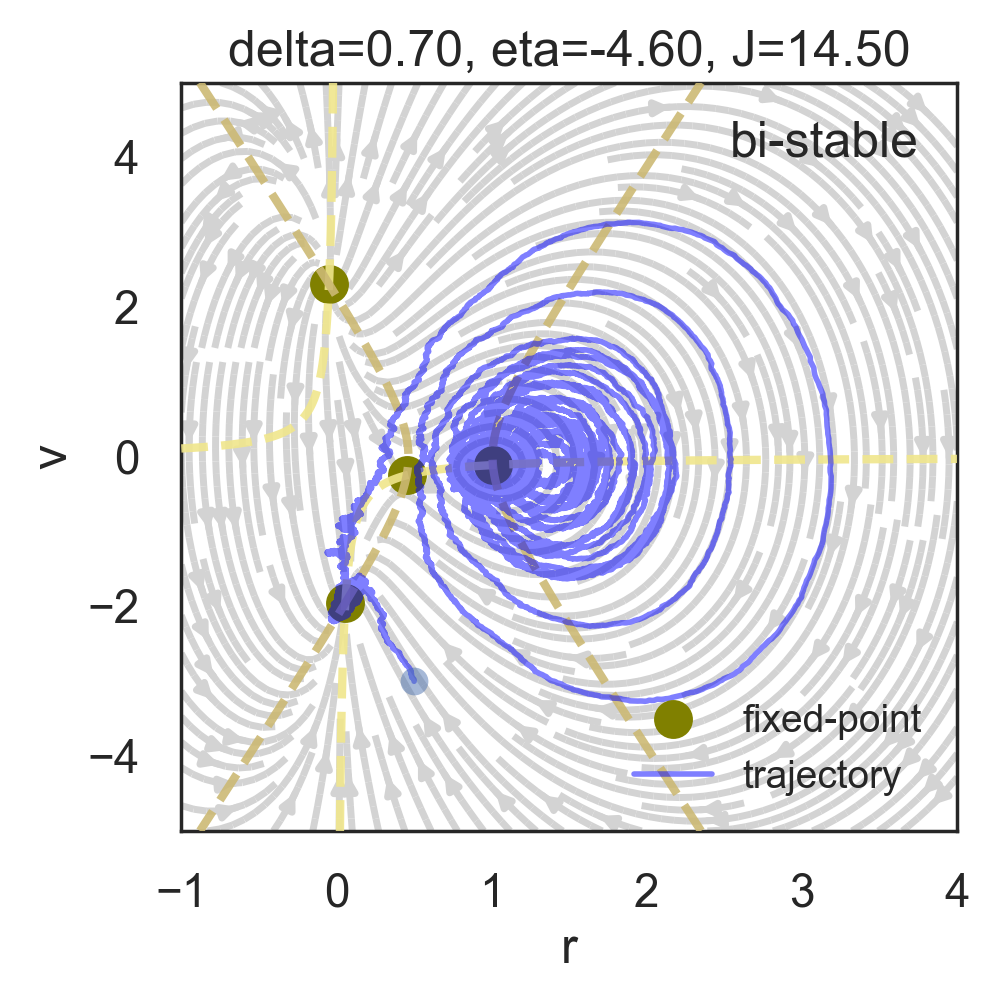

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [412]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
j=0
param=scenarios[j]
xrange = (-1, 4) 
yrange =(-5, 5)
v,r = Montbrio_model(v0, r0, param['delta'], param['eta'], param['J'], I_input, dt, sigma)
plot_vector_field(ax, param, xrange, yrange)
#plot_nullcline(ax, **param)
for i in range (len(eqnproot[j])):
    if i == len(eqnproot[j]) - 1:
        plt.plot(eqnproot[j][i][0], eqnproot[j][i][1], marker="o", markersize=14, lw=0, color='olive', zorder=3, label='fixed-point')
    else:
        plt.plot(eqnproot[j][i][0], eqnproot[j][i][1], marker="o", markersize=14, lw=0, color='olive', zorder=3)

plt.plot(r,v,  marker="o", markersize=0, lw=2, color='blue',  alpha=0.5, label='trajectory', zorder=4)
plt.plot(r[0],v[0],  marker="o", markersize=10, lw=0, color='b', alpha=0.5, zorder=5)

ax.set(xlabel='r', ylabel='v',  title="delta={:.2f}".format(param["delta"]) +", eta={:.2f}".format(param["eta"]) +", J={:.2f}".format(param["J"]))
ax.legend(loc='lower right', frameon=False, fontsize=14)
text = 'bi-stable'
ax.text(0.95, 0.95, text, transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize=18)
plt.tight_layout()
plt.show()

In [413]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 7))
# j=0
# param=scenarios[j]
# xrange = (-1, 4) 
# yrange =(-5, 5)
# v,r = Montbrio_model(v0, r0, param['delta'], param['eta'], param['J'], I_input, dt, sigma)
# plot_vector_field(ax, param, xrange, yrange)
# #plot_nullcline(ax, **param)
# for i in range (len(eqnproot[j])):
#     if i == len(eqnproot[j]) - 1:
#         plt.plot(eqnproot[j][i][1], eqnproot[j][i][0], marker="o", markersize=14, lw=0, color='olive', zorder=3, label='fixed-point')
#     else:
#         plt.plot(eqnproot[j][i][1], eqnproot[j][i][0], marker="o", markersize=14, lw=0, color='olive', zorder=3)

# plt.plot(r,v,  marker="o", markersize=0, lw=2, color='r',  alpha=0.5, label='trajectory', zorder=4)
# plt.plot(r[0],v[0],  marker="o", markersize=10, lw=0, color='r', alpha=0.5, zorder=5)

# ax.set(xlabel='r', ylabel='v',  title="delta={:.2f}".format(param["delta"]) +", eta={:.2f}".format(param["eta"]) +", J={:.2f}".format(param["J"]))
# ax.legend(loc='lower right', frameon=False, fontsize=14)
# text = 'bi-stable'
# ax.text(0.95, 0.95, text, transform=ax.transAxes,
#         horizontalalignment='right', verticalalignment='top', fontsize=18)
# plt.tight_layout()
# plt.show()

<IPython.core.display.Javascript object>


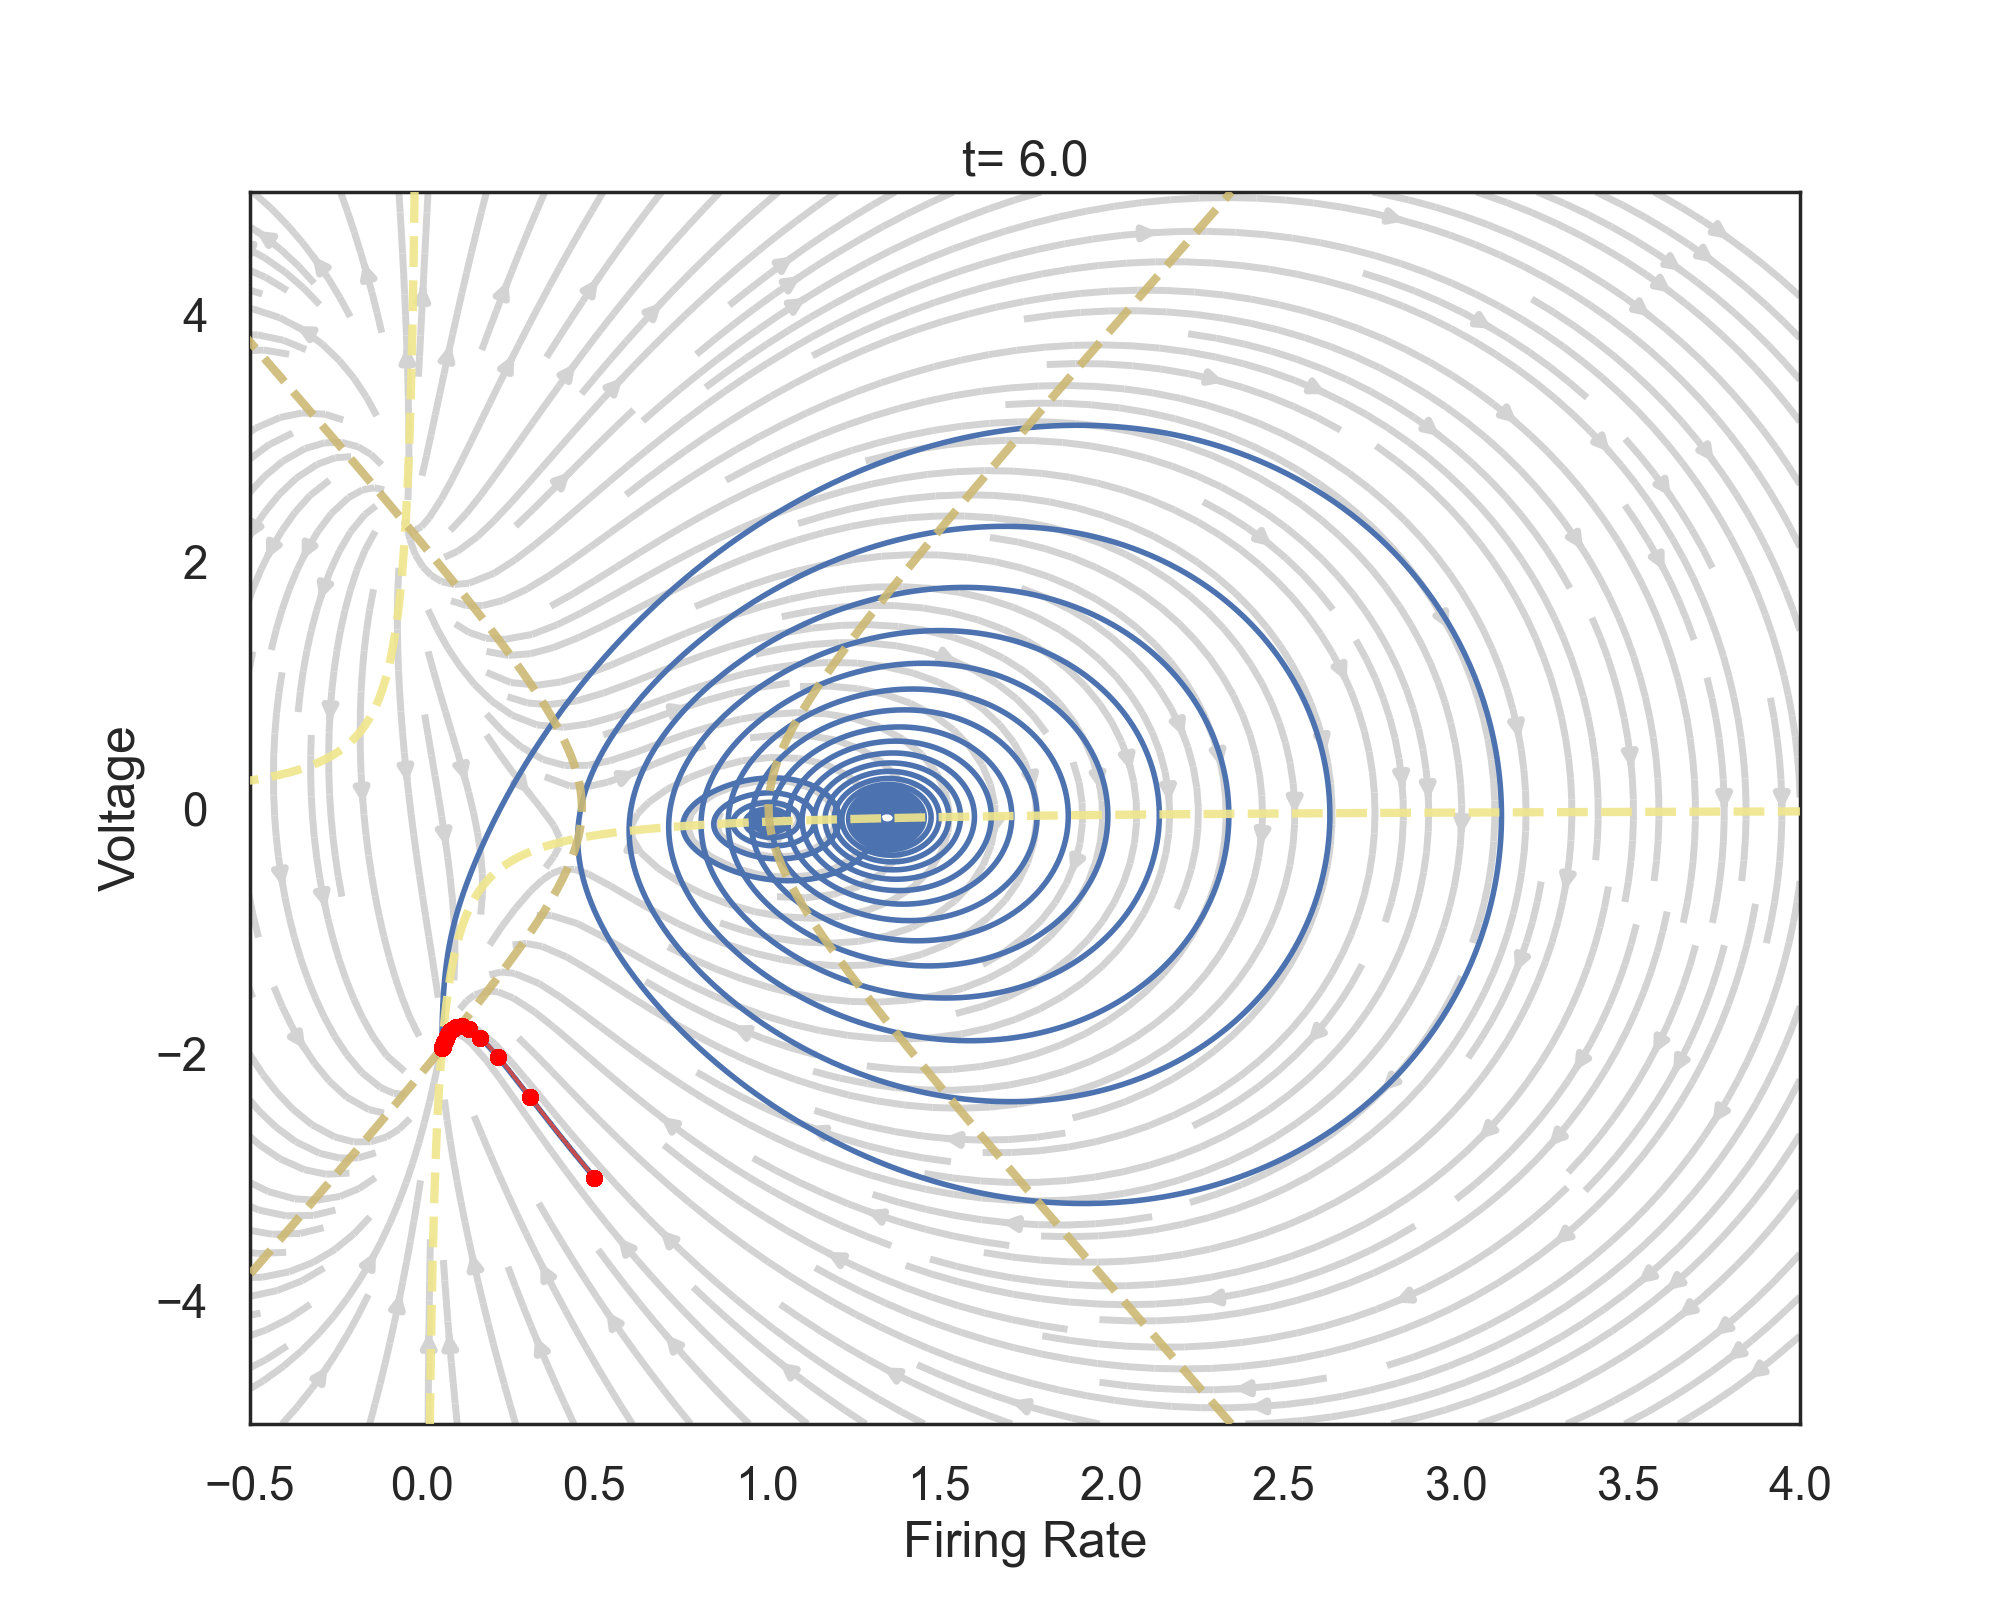

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [414]:
param=scenarios[0]
delta, eta, J= param['delta'], param['eta'], param['J'], 

fig, ax = plt.subplots(figsize=(10, 8))
xrange = (-1, 4) 
yrange =(-5, 5)
plot_vector_field(ax, param, xrange, yrange)
ax.plot(r_obs, v_obs,  marker="o", markersize=0, lw=2, color='b', zorder=2) # plot the line

#line, = ax.plot(r, v, color='r')
ds=10*10

r_ = r_fit[::ds]
v_ = v_fit[::ds]

# ax.set_xlim(-.1, 4.)
# ax.set_ylim(-4., 4.)


def animate_rv(i):
    ax.plot(r_[:i], v_[:i], 'o', markersize=6, color='red', zorder=4)
    if i<600:
        ax.plot(r_fit[:i*ds], v_fit[:i*ds],  lw=1, color='r', zorder=2, ) # plot the line
        ax.plot(r_fit[:i], v_fit[:i],  lw=1, color='r', zorder=2, ) # plot the line
    #ax.scatter(r[i], v[i], s=50, color='red', zorder=4) 
    ax.set_xlim([-.5, 4.]) 
    ax.set_ylim([-5., 5.])
    ax.set_xlabel('Firing Rate')
    ax.set_ylabel('Voltage')
    ax.set_title(f"t= {i/10}")
    
#plot_vector_field(ax, param, xrange, yrange)
anim_rv = animation.FuncAnimation(fig, animate_rv, frames=len(ts) + 1, interval=1, blit=True, repeat=False)

ax.set_xlabel('Firing Rate')
ax.set_ylabel('Voltage')

#anim_rv.save('MPR_ode_phaseplane.mp4', writer='ffmpeg', fps=100, dpi=300)

plt.show()


In [415]:
ds=int(50*(10/2))

fig = plt.figure(figsize=(10, 4))

gs = gridspec.GridSpec(3, 3, figure=fig, width_ratios=[1, 1, 2])
######################
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[:2, 2])


ax1.plot(ts, v_obs,  marker="o", markersize=0, lw=2, color='b', zorder=2) # plot the line
ax1.set_title('Membrane Potential (v)', fontsize=16)
ax1.set_xticks([])
ax1.tick_params(axis='both', labelsize=12)

ax2.plot(ts, r_obs,  marker="o", markersize=0, lw=2, color='b', zorder=2) # plot the line
ax2.set_title('Firing rate (r)', fontsize=16)
ax2.set_xlabel('Time (t)' , fontsize=16); 
ax2.tick_params(axis='both', labelsize=12)
ax2.plot(ts, I_input, 'g', linewidth=2)


#xrange = (-0.1, 4) 
#yrange =(-4., 4.)

xrange = (-1, 4) 
yrange =(-5, 5)

plot_vector_field(ax3, param, xrange, yrange)
ax3.plot(r_obs, v_obs,  marker="o", markersize=0, lw=2, color='b', zorder=2) # plot the line

r_ = r_fit[::ds]
v_ = v_fit[::ds]

ax3.set_xlim(-0.5, 4.)
ax3.set_ylim(-5., 5.)
ax3.tick_params(axis='both', labelsize=12)

def update_frame(i):
    ax1.cla() 
    ax2.cla() 
    #ax3.cla() 

    ax1.plot(ts, v_obs,  marker="o", markersize=0, lw=2, color='b', zorder=2, label='observed') # plot the line
    ax1.plot(ts[:i*ds], v_fit[:i*ds],  marker="o", markersize=0, lw=2, color='r', zorder=4, label='fitted') # plot the line
    ax1.scatter(ts[i*ds], v_fit[i*ds], s=50, color='red', zorder=4) 
    ax1.set_xlim([0, 100]) 
    ax1.set_ylim([-5., 5.]) 
    ax1.set_ylabel('v', fontsize=16)
    ax1.set_xticklabels([])
    ax1.tick_params(axis='both', labelsize=12)
    #ax1.set_xlabel('Time'); 
    #ax1.set_xticks([])
    #ax1.set_title('HMC computational cost: 98h 33min 13sec', fontsize=12)
    ax1.set_title('SBI computational cost: 1h 36min 21sec', fontsize=12)
    #ax1.set_title('HMC computational cost: 15h 56min 26sec', fontsize=12)
    #ax1.set_title('SBI computational cost: 1h 47min 37sec', fontsize=12)
    #ax1.set_title('HMC computational cost: 100h 6min 57sec', fontsize=12)
    #ax1.set_title('SBI computational cost: 1h 27min 34sec', fontsize=12)
    ax1.legend(loc='upper right', frameon=False, fontsize=12)
    ax1.grid()


    ax2.plot(ts, r_obs,  marker="o", markersize=0, lw=2, color='b', zorder=2, label='observed') # plot the line
    ax2.plot(ts[:i*ds], r_fit[:i*ds],  marker="o", markersize=0, lw=2, color='r', zorder=4, label='fitted') # plot the line
    ax2.scatter(ts[i*ds], r_fit[i*ds], s=50, color='red', zorder=4) 
    ax2.set_xlim([0, 100]) 
    ax2.set_ylim([-0.5, 4]) 
    ax2.set_ylabel('r', fontsize=16)
    ax2.set_xlabel('t', fontsize=16); 
    ax2.tick_params(axis='both', labelsize=12)
    #ax2.legend(loc='upper right')
    #ax2.set_title('Firing rate')
    ax2.grid()
    ax2.plot(ts, 0.1*I_input,  lw=2, color='cyan', zorder=2, label='$I_{input}$') 
    ax2.legend(loc='upper right', frameon=False, fontsize=12)


    ax3.plot(r_[:i], v_[:i], 'o', markersize=5, color='red', zorder=4)

    if i<600:
        ax3.plot(r_fit[:i*ds], v_fit[:i*ds],  lw=1, color='r', zorder=2, ) 
        #ax3.plot(r_fit[:i], v_fit[:i],  lw=1, color='r', zorder=2, ) 

    #ax3.scatter(r[i], v[i], s=50, color='red', zorder=4) 
    ax3.set_xlim([-0.5, 4]) 
    ax3.set_ylim([-5., 5.])
    ax3.tick_params(axis='both', labelsize=12)
    ax3.set_xlabel('r', fontsize=16)
    ax3.set_ylabel('v', fontsize=16)
    ax3.set_title(f"t= {i/int(2*2)}", fontsize=16)

#plot_vector_field(ax, param, xrange, yrange)
ax3.set_title('Phase-plane', fontsize=12)
#ax3.set_aspect('equal', adjustable='box')
plt.tight_layout()

fig.subplots_adjust(left=0.1,  bottom=-.25, wspace=.6, hspace=0.3)

anim = animation.FuncAnimation(fig, update_frame, frames=len(ts-1) , interval=1, blit=True, repeat=False)
#anim.save('Movie1_MPR_ODE_HMC_RV.mp4', writer='ffmpeg', fps=30, dpi=800)
anim.save('Movie2_MPR_ODE_SBI_RV.mp4', writer='ffmpeg', fps=30, dpi=800)
#anim.save('Movie3_MPR_SDE_HMC_RV.mp4', writer='ffmpeg', fps=30, dpi=800)
#anim.save('Movie4_MPR_SDE_SBI_RV.mp4', writer='ffmpeg', fps=30, dpi=800)
#anim.save('Movie5_MPR_SDE_HMC_V.mp4', writer='ffmpeg', fps=30, dpi=800)
#anim.save('Movie6_MPR_SDE_SBI_V.mp4', writer='ffmpeg', fps=30, dpi=800)

plt.show()

<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


IndexError: index 100000 is out of bounds for axis 0 with size 100000